In [1]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib  inline

/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17524097958990369069
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7354056704
locality {
  bus_id: 1
}
incarnation: 35783994182776244
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
daisy = 'flowers/daisy/*.jpg'
dandalion = 'flowers/dandelion/*.jpg'
rose = 'flowers/rose/*.jpg'
sunflower = 'flowers/sunflower/*.jpg'
tulip = 'flowers/tulip/*.jpg'

In [4]:
import glob
import os

def read_img(path, label):
    image_stack = []
    labels = []
    #name = str(path)
    for img in glob.glob(path):
        #f = img.find("/")+1
        
        labels.append(label)
        image = cv2.imread(img)
        img_res = cv2.resize(image, (128, 128), cv2.INTER_LINEAR)
        image_stack.append(img_res)
        #image_stack = np.asarray(image_stack)
    return (image_stack), labels


In [5]:
data = {0:'flowers/daisy/*.jpg', 1:'flowers/dandelion/*.jpg', 2:'flowers/rose/*.jpg', 
        3:'flowers/sunflower/*.jpg',4:'flowers/tulip/*.jpg' }
#targets = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

dataset = []
labels = []
for key, path in data.items():
    images, label = read_img(path, key)
    dataset += images
    labels += label
dataset = np.asarray(dataset)
labels = np.asarray(labels)

In [6]:
print('Dataset shape:',dataset.shape)
print('Labels shape:',labels.shape)

Dataset shape: (4323, 128, 128, 3)
Labels shape: (4323,)


In [7]:
target = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}

In [8]:
from sklearn.model_selection import train_test_split
from random import *

In [9]:
X_tr, X_te, Y_tr, Y_te = train_test_split(dataset, labels, test_size = 0.1, random_state=0)

In [10]:
Y_tr.shape

(3890,)

In [11]:
import matplotlib.gridspec as gridspec
def plot_dataset(X, Y, target, samples):
    l = len(X)
    n = 0
    gs = gridspec.GridSpec(10, 6)
    plt.figure(figsize=(25, 30))
    for i in range(samples):
        ax = plt.subplot(gs[n])
        index = randint(1, l)
        image = X[index]
        label = target[Y[index]]
        n+=1
        plt.text(0, -2, label)
        plt.imshow(image)
    #plt.imshow()

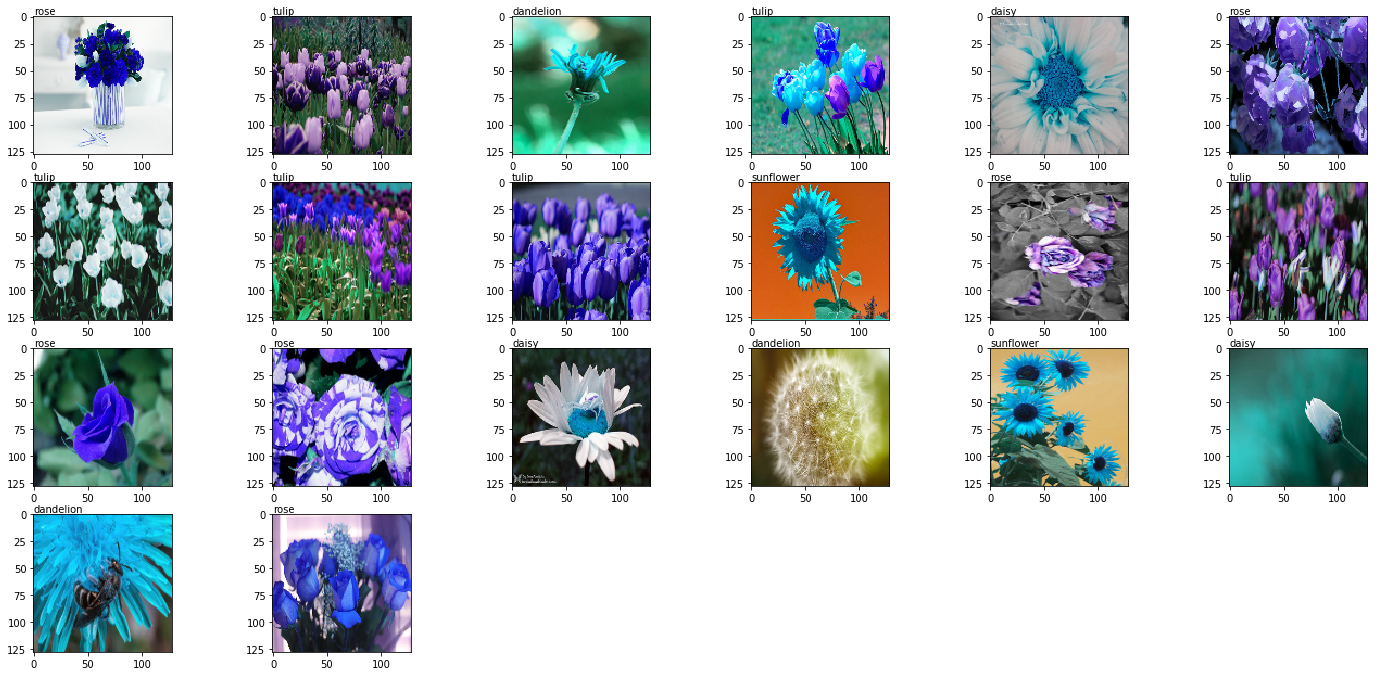

In [38]:
plot_dataset(X_tr, Y_tr, target, 20)

In [12]:
#Buiding my model
from IPython.display import Image
Image(url='http://www.nallatech.com/wp-content/uploads/CNN-Figure-02.png')

In [13]:
from keras.layers import MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D

In [14]:
def normalization(img):
    img = cv2.normalize(img, img, 50, 200, cv2.NORM_MINMAX)
    cv2.medianBlur(img, 3)
    return img

In [15]:
l = len(X_tr)
l2 = len(X_te)
for i in range(l):
    X_tr[i] = normalization(X_tr[i])
for i in range(l2):
    X_te[i] = normalization(X_te[i])

In [16]:
def CNN():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_tr.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
   
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(n_classes))
   
    
    return model
        
    

In [17]:


feat = X_tr.shape[1]
n_classes = len(set(Y_tr))
channels = X_tr.shape[3]
Y_tr = to_categorical(Y_tr, n_classes)
Y_te = to_categorical(Y_te, n_classes)


In [18]:
learning_rate = 8e-4
model = CNN()
model.add(Activation('softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_3 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 32)      9248      
__________

In [20]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, shear_range=0.2,
                        height_shift_range=0.2, zoom_range=0.2, rescale=1./255, horizontal_flip=True,
        fill_mode='nearest' )

In [22]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [23]:
test_gen = ImageDataGenerator()
batch_size = 32

In [24]:
train_generator = gen.flow(X_tr, Y_tr, batch_size=batch_size)
test_generator = test_gen.flow(X_te, Y_te, batch_size=batch_size)

In [25]:
model.fit_generator(train_generator, steps_per_epoch=X_tr.shape[0]//batch_size, epochs=18, 
                   validation_data=test_generator, validation_steps=X_te.shape[0]//batch_size)

Epoch 1/18
121/121 [==============================] - 13s 107ms/step - loss: 1.6445 - acc: 0.3795 - val_loss: 1.3483 - val_acc: 0.4062
Epoch 2/18
121/121 [==============================] - 11s 92ms/step - loss: 1.2041 - acc: 0.4988 - val_loss: 1.0716 - val_acc: 0.5935
Epoch 3/18
121/121 [==============================] - 11s 92ms/step - loss: 1.0746 - acc: 0.5742 - val_loss: 0.9936 - val_acc: 0.6035
Epoch 4/18
121/121 [==============================] - 11s 90ms/step - loss: 0.9804 - acc: 0.6214 - val_loss: 1.0293 - val_acc: 0.6284
Epoch 5/18
121/121 [==============================] - 11s 88ms/step - loss: 0.8493 - acc: 0.6802 - val_loss: 0.9794 - val_acc: 0.6135
Epoch 6/18
121/121 [==============================] - 11s 89ms/step - loss: 0.7749 - acc: 0.7144 - val_loss: 1.1849 - val_acc: 0.5885
Epoch 7/18
121/121 [==============================] - 11s 89ms/step - loss: 0.6424 - acc: 0.7633 - val_loss: 1.1695 - val_acc: 0.6135
Epoch 8/18
121/121 [==============================] - 11s 88m

In [26]:
test = model.evaluate(X_te, Y_te)
print('Testing results:{} {}'.format(test[0],test[1]))

433/433 [==============================] - 0s 927us/step
Testing results:1.7498304012465973 0.6605080836914978
